## Image Classification Using Logistic Regression
In this notebook, we will implement a logistic regression model using PyTorch for classification of images from the MNIST dataset. The objective of this project is to build a binary classifier that can distinguish between images of handwritten digits 0 and 9.
The MNIST dataset is a classic dataset used in computer vision research and consists of a set of 70,000 images of handwritten digits. Each image is 28x28 pixels in size and has a corresponding label indicating the digit it represents.

The steps we will follow in this notebook include:
* Loading and preprocessing the MNIST dataset
* Defining the logistic regression model using PyTorch
* Training the model on the dataset
* Evaluating the model's performance on a test set
By the end of this notebook, we should have a working implementation of logistic regression for classification of images from the MNIST dataset, and have gained some practical experience using PyTorch for machine learning tasks.

In [42]:
# importing our libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from tqdm.notebook import tqdm
from torchvision import datasets, transforms

In [ ]:
# import our dataset
mnist_train = datasets.MNIST(root='./datasets', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root='./datasets', train=False, transform=transforms.ToTensor(),download=True)

In [6]:
# viewing the size of our test and train data
print(f'Train data: {len(mnist_train)}')
print(f'Test data: {len(mnist_test)}')

Train data: 60000
Test data: 10000


Label: 3


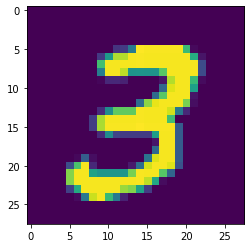

In [9]:
# veiwing one of the images in our train data
image, label = mnist_train[7]
image = image.view(28,28) #we have to reashape the image tensor to plot
plt.imshow(image)
print(f'Label: {label}')

We will be making use of the Dataloader method to load our train data to our model in batches and shuffle our dataset.

In [13]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100)

##Logistic Regression Model

To train our simple logistic regression model using a fully connected neural network we will be following these steps:<br>
1. Draw a minibatch<br>
2. Perform forward pass; make prediction and detrmine loss <br>
3. Perform backward pass; calculate gradient and update weights and bias to reduce loss<br>

In [23]:
# training our model
W = torch.randn(28*28, 10)/np.sqrt(28*28) # intitalizing random weights
W.requires_grad_()
b = torch.zeros(10, requires_grad=True)

# instantiate our optimizer object
optimizer = torch.optim.SGD([W,b], lr=0.01)

# iterate through our training data
for image, label in tqdm(train_loader):
  # zero out gradients
  optimizer.zero_grad()
  # forward pass
  x = image.view(-1,28*28)
  y = torch.matmul(x,W) + b
  loss = F.cross_entropy(y, label)
  # backward pass
  loss.backward()
  optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

In [36]:
# testing our model
correct = 0
total = len(mnist_test)

# iterate through our test data
with torch.no_grad():
  for image, label in tqdm(test_loader):
    # forward pass
    x = image.view(-1,28*28)
    y = torch.matmul(x, W) + b

    prediction = torch.argmax(y, dim=1)
    correct += torch.sum((prediction == label).float())
print(f'Test Accuracy: {correct/total}')

  0%|          | 0/100 [00:00<?, ?it/s]

Test Accuracy: 0.8515999913215637


Using modules already present in PyTorch we can build a logistic regression model by writing our code in an object oriented manner.

Refactoring our previous complete logistic regression code to use a nn.Module:

In [66]:
# define our model
class LogRegModule(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin = nn.Linear(784,10)
  def forward(self, x):
    return self.lin(x)

## Training
# instantiate our model object
model = LogRegModule()

# optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
criteria = nn.CrossEntropyLoss()

# iterate through our training dataset
for image, label in tqdm(train_loader):
  # zero out gradient
  optimizer.zero_grad()
  # forward pass
  x = image.view(-1,784)
  y = model.forward(x)
  loss = criteria(y, label)
  # backward pass
  loss.backward()
  optimizer.step()

## testing our module
correct = 0
total = len(mnist_test)
# iterating through our test data
with torch.no_grad():
  for image, label in tqdm(test_loader):
    x = image.view(-1,784)
    y = model.forward(x)

    prediction = torch.argmax(y, dim=1)
    correct += torch.sum((prediction == label).float())
print(f'Test Accuracy: {correct/total}')

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test Accuracy: 0.850600004196167


## Conclusion

In conclusion, we have successfully implemented a logistic regression model using PyTorch for classification of images from the MNIST dataset, achieving an accuracy of 85% on the test set for digits 0 to 9.

The model was able to effectively distinguish between handwritten digits, and the performance could be further improved with more complex models such as neural networks or advanced techniques such as data augmentation.

This project provided a great introduction to PyTorch and its capabilities for machine learning tasks, as well as a practical example of how to implement a logistic regression model for image classification on a widely used dataset in computer vision research.